# First notebook

In [125]:
import pandas as pd

dfEindtoets = pd.read_csv('Data/eindtoets.csv', sep=";")
dfFivePoints = pd.read_csv('Data/restructured_fivepointstest.csv')

In [126]:
# Drop column Unnamed
dfFivePoints = dfFivePoints.drop('Unnamed: 0', axis=1)

dfFivePoints.head()

,student_id,patternsm,statuscl,numbercl,timestampcl,timestampload,timestampsm,primary_keys
0,1,"0,0,1,0,0,0,1,0","1,1","3,7","1583742751461,1583742751869",1.583743e+12,2520.0,"[36, 37, 38, 39, 40, 41]"
1,1,"1,1,0,0,0,0,0,0","1,1","2,1","1583742753766,1583742754238",1.583743e+12,2576.0,"[47, 48, 49, 50, 51, 52]"
2,1,"0,0,1,1,0,0,0,0","1,1","3,4","1583742756412,1583742756876",1.583743e+12,2541.0,"[53, 54, 55, 56, 57, 58]"
3,1,"0,0,0,0,0,1,0,1","1,1","8,6","1583742759029,1583742759476",1.583743e+12,2540.0,"[59, 60, 61, 62, 63, 64]"
4,1,"0,0,1,1,0,0,0,0","1,1","4,3","1583742761381,1583742762222",1.583743e+12,2384.0,"[65, 66, 67, 68, 69, 70]"


In [127]:
# Amount unique student id
print('Amount of unique student id in eindtoets:', len(dfFivePoints['student_id'].unique()))

Amount of unique student id in eindtoets: 4550


In [128]:
# Cleaning data
dfEindtoets['cito'] = dfEindtoets['cito'].replace('', pd.NA).astype('Int64')
dfEindtoets['schooljaar'] = dfEindtoets['schooljaar'].replace('', pd.NA)
dfEindtoets['gender'] = dfEindtoets['gender'].replace('', pd.NA).astype('Int64')

# Filtering rows
filtered_df = dfEindtoets.dropna(subset=['cito', 'school', 'gender'])

# Output
print(filtered_df[['idll_vo3lv', 'cito','school', 'gender']])

      idll_vo3lv  cito   school  gender
1              3   518  vmbo kl       1
4              6   524  vmbo bl       0
6              8   529  vmbo bl       1
9             11   533  vmbo kl       0
11            13   534  vmbo kl       0
...          ...   ...      ...     ...
4227        9638   549      vwo       1
4228        9640   543      vwo       0
4231        9649   543      vwo       1
4232        9656   543      vwo       0
4234        9663   545      vwo       0

[2214 rows x 4 columns]


In [129]:
# Print unique values for student_id for Eindtoets as a list
print('Unique student_id in Eindtoets:', sorted(dfEindtoets['idll_vo3lv'].unique().tolist()))

# Print unique values for student_id for FivePoints as a list and sort them
print('Unique student_id in FivePoints:', sorted(dfFivePoints['student_id'].unique().tolist()))

# Check how many students are different in both datasets
print('Students that are in Eindtoets but not in FivePoints:', len(set(dfEindtoets['idll_vo3lv'].unique()) - set(dfFivePoints['student_id'].unique())))

# viceversa
print('Students that are in FivePoints but not in Eindtoets:', len(set(dfFivePoints['student_id'].unique()) - set(dfEindtoets['idll_vo3lv'].unique())))

Unique student_id in Eindtoets: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 21, 25, 26, 29, 30, 32, 33, 35, 36, 37, 39, 40, 41, 45, 49, 51, 54, 55, 56, 58, 64, 65, 66, 67, 68, 69, 70, 71, 73, 75, 77, 79, 80, 81, 82, 83, 85, 86, 87, 95, 101, 103, 105, 108, 109, 110, 111, 112, 115, 116, 117, 118, 119, 121, 122, 123, 127, 129, 130, 131, 132, 133, 135, 136, 140, 141, 145, 146, 150, 158, 159, 160, 163, 172, 175, 176, 178, 179, 180, 185, 187, 191, 196, 200, 204, 206, 208, 209, 210, 211, 212, 214, 218, 222, 224, 227, 228, 230, 235, 236, 237, 239, 243, 246, 247, 248, 250, 251, 252, 253, 254, 255, 256, 258, 260, 261, 264, 266, 268, 273, 274, 275, 277, 279, 280, 281, 282, 284, 288, 293, 296, 297, 298, 300, 301, 304, 305, 306, 309, 310, 312, 313, 316, 317, 320, 323, 326, 329, 330, 332, 335, 336, 341, 343, 344, 345, 347, 348, 349, 352, 353, 354, 356, 357, 359, 361, 362, 364, 373, 376, 378, 379, 382, 383, 385, 386, 387, 395, 396, 398, 401, 402, 403, 404, 406, 409, 410, 413, 414, 417, 418, 

In [130]:
# Make a new dataframe, containing unique values from the FivePoints dataset
dfStudents = dfFivePoints.drop_duplicates(subset=['student_id'])

# Keep only student_id
dfStudents = dfStudents[['student_id']]

# sort by student_id
dfStudents = dfStudents.sort_values(by='student_id')

# Merge cito and school columns from Eindtoets to the new dataframe
dfStudents = dfStudents.merge(dfEindtoets[['idll_vo3lv', 'cito', 'school']], left_on='student_id', right_on='idll_vo3lv', how='left')

# drop idll_vo3lv column
dfStudents = dfStudents.drop('idll_vo3lv', axis=1)

# Print how many NaN values for School
print('NaN values for School:', dfStudents['school'].isnull().sum())

# Print how many NaN values for Cito
print('NaN values for Cito:', dfStudents['cito'].isnull().sum())

dfStudents.head(20)

NaN values for School: 314
NaN values for Cito: 2279


,student_id,cito,school
0,1,<NA>,NaN
1,2,<NA>,vmbo kl
2,3,518,vmbo kl
3,4,<NA>,vmbo kl
4,5,<NA>,vmbo kl
5,6,524,vmbo bl
6,7,<NA>,vmbo kl
7,8,529,vmbo bl
8,9,<NA>,vmbo kl
9,10,<NA>,vmbo kl


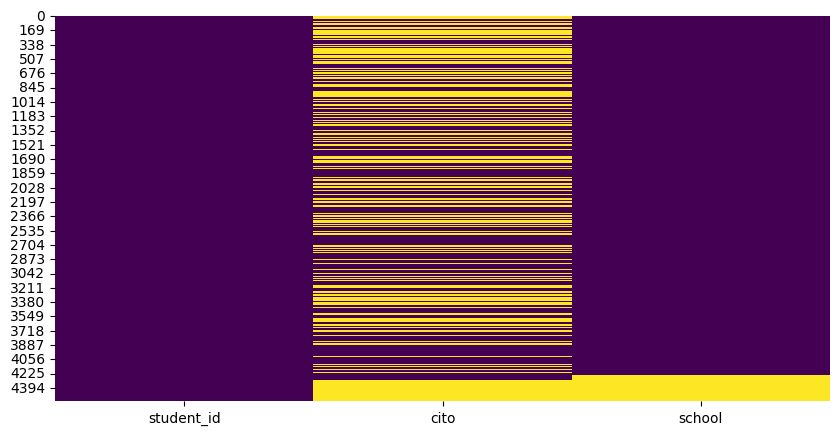

In [131]:
# Visualize percentage missing values for each column
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(dfStudents.isnull(), cbar=False, cmap='viridis')
plt.show()